In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
import os
datasets_path = '/content/drive/MyDrive/datasets asah'

dfs = {}
for filename in os.listdir(datasets_path):
  if not filename.endswith('.csv'):
    continue
  df = pd.read_csv(os.path.join(datasets_path, filename))
  # set index by the first column
  df.set_index(df.columns[0], inplace=True)
  dfs[filename.removesuffix('.csv')] = df
  print(f"{filename} has: {len(df)} rows ")


developer_journey_trackings.csv has: 74348 rows 
developer_journey_submissions.csv has: 2262 rows 
developer_journey_tutorials.csv has: 9682 rows 
developer_journeys.csv has: 176 rows 
developer_journey_completions.csv has: 1032 rows 
exam_registrations.csv has: 16759 rows 
exam_results.csv has: 17438 rows 
users.csv has: 31 rows 


In [3]:
df_journeys = dfs['developer_journeys']
df_journeys.head()

,name,difficulty,status,created_at,updated_at,deadline,trial_deadline,graduation,hours_to_study
id,,,,,,,,,
14,Belajar Fundamental Aplikasi Android,2,1,2016-09-21 00:48:38,2025-05-26 08:44:22,135,1,1,140
51,Belajar Membuat Aplikasi Android untuk Pemula,1,1,2017-09-05 19:56:12,2025-05-26 08:44:37,45,1,1,60
80,Memulai Pemrograman dengan Kotlin,0,1,2018-08-01 09:55:22,2025-05-26 08:47:14,40,1,1,50
86,Memulai Pemrograman dengan Python,0,1,2018-08-13 09:47:35,2025-08-13 14:34:14,50,1,1,60
123,Belajar Dasar Pemrograman Web,0,1,2019-04-15 15:02:41,2025-09-12 10:08:17,45,1,1,45


In [30]:
drive_path = "/content/drive/MyDrive/datasets asah/clean"

# Data cleaning & feature engineering

## Developer Journey Trackigns

In [4]:
df_trackings = dfs['developer_journey_trackings']
# df_trackings.index = df_trackings['id']
# df_trackings.drop(columns=['id'], inplace=True)
df_trackings.head()

,journey_id,tutorial_id,developer_id,status,last_viewed,first_opened_at,completed_at,developer_journey_status_hash
id,,,,,,,,
2313738,32,1152,96989,1,2020-04-08 20:59:59,2018-08-29 11:19:41,NaN,0x9926AAB1
2314290,32,719,96989,1,2020-04-08 21:00:14,2018-08-29 11:32:44,NaN,0x9926AAB1
2315530,32,725,96989,1,2020-04-09 23:51:16,2018-08-29 12:23:47,NaN,0x9926AAB1
2383030,72,2183,96989,1,2019-02-05 09:20:39,2018-09-02 17:11:57,NaN,0x74E4C8D5
2383039,32,728,96989,1,2019-02-05 09:21:43,2018-09-02 17:13:18,NaN,0x9926AAB1


### Hapus course yang belum diselesaikan dan sttus hash

In [5]:
df_trackings = df_trackings.dropna(subset=['completed_at']).drop(columns=['developer_journey_status_hash'])

In [6]:
display(df_trackings.isnull().sum())
df_trackings.head()

,0
journey_id,0
tutorial_id,0
developer_id,0
status,0
last_viewed,0
first_opened_at,0
completed_at,0


,journey_id,tutorial_id,developer_id,status,last_viewed,first_opened_at,completed_at
id,,,,,,,
4192267,104,3107,96989,1,2019-05-11 18:23:24,2019-05-11 18:23:24,2019-05-12 13:06:05
4203250,104,3110,96989,1,2019-05-13 18:29:58,2019-05-13 11:45:00,2019-05-13 18:30:17
4206789,104,3233,96989,1,2019-05-14 15:39:34,2019-05-13 18:30:15,2019-05-13 18:38:50
4206801,104,3236,96989,1,2019-05-14 15:39:55,2019-05-13 18:38:47,2019-05-13 18:51:42
4206820,104,3239,96989,1,2019-05-13 18:51:42,2019-05-13 18:51:42,2019-05-13 20:34:07


### New feature: seen_after_completion & study_duration

In [7]:
df_trackings['completed_at'] = pd.to_datetime(df_trackings['completed_at'])

In [8]:
df_trackings['first_opened_at'] = pd.to_datetime(df_trackings['first_opened_at'])

In [9]:
df_trackings['last_viewed'] = pd.to_datetime(df_trackings['last_viewed'])

In [10]:
df_trackings['seen_after_completion'] = df_trackings['completed_at'] < df_trackings['last_viewed']

In [11]:
df_trackings['seen_after_completion'].value_counts()

,count
seen_after_completion,
False,57832
True,14001


## Durasi belajar tutorial (sub materi)

In [12]:
df_trackings.loc[4192267]

,4192267
journey_id,104
tutorial_id,3107
developer_id,96989
status,1
last_viewed,2019-05-11 18:23:24
first_opened_at,2019-05-11 18:23:24
completed_at,2019-05-12 13:06:05
seen_after_completion,False


In [13]:
df_trackings['study_duration_total'] = df_trackings['completed_at'] - df_trackings['first_opened_at']

In [14]:
# get duration in minutes
df_trackings['study_duration_total'] = df_trackings['study_duration_total'].dt.total_seconds() / 60
df_trackings['study_duration_total']

,study_duration_total
id,
4192267,1122.683333
4203250,405.283333
4206789,8.583333
4206801,12.916667
4206820,102.416667
...,...
453454235,1.733333
453454547,30269.733333
454630976,25.183333


<Axes: >

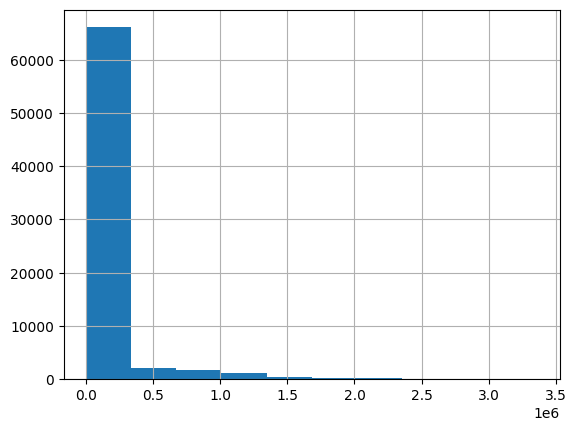

In [15]:
df_trackings['study_duration_total'].hist()

### Remove outlier (IQR Method)

Q3:  1.55


<Axes: >

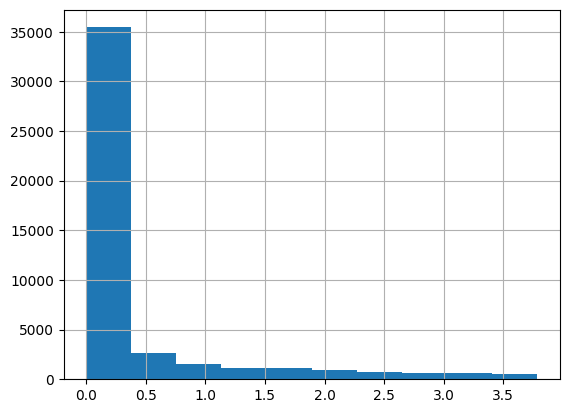

In [ ]:
# Q3 = df_trackings['study_duration_total'].quantile(0.75)
# Q1 = df_trackings['study_duration_total'].quantile(0.25)
# IQR = Q3 - Q1

# print("Q3: ", Q3)

# # # hapus 1.5
# df_trackings = df_trackings[df_trackings['study_duration_total'] < (Q3 + (1.5 * IQR))]
# df_trackings['study_duration_total'].hist()

# Cek hari (dalam satu minggu) tiap user mengerjakan
Ex: mon, tue, wed

Perlu somehow menghitung konsistensi pengerjaan dalam satu minggu

perlu juga menghitung frekuensi materi diselesaikan mingguan / harian


In [16]:
df_trackings['dow_start'] = df_trackings['first_opened_at'].dt.day_name()
df_trackings['dow_finished'] = df_trackings['completed_at'].dt.day_name()
df_trackings['dow_revisit'] = df_trackings['last_viewed'].dt.day_name()

### Gunakan data yang penting (ekspor)

In [17]:
used_col = ['journey_id', 'tutorial_id', 'developer_id', 'status',
            'seen_after_completion', 'study_duration_total', 'dow_start',
            'dow_finished', 'dow_revisit']

In [31]:
df_trackings[used_col].to_csv(os.path.join(drive_path,
                                           'developer_journey_trackings_cleaned.csv'),
                               index=False)

## Developer Journey submission

In [19]:
df_submission = dfs['developer_journey_submissions']
df_submission.head()

,journey_id,quiz_id,submitter_id,status,as_trial_subscriber,created_at,updated_at,started_review_at,ended_review_at,rating,first_opened_at,submission_duration,pass_auto_checker
id,,,,,,,,,,,,,
94634,14,258,3390,1,0,2018-05-30 14:54:33,2018-12-21 16:01:22,2018-05-31 05:33:02,2018-05-31 05:45:44,4,NaN,0,NaN
95480,14,332,3390,-1,0,2018-06-12 10:05:10,2018-12-21 16:02:16,2018-06-12 10:36:57,2018-06-12 11:10:29,0,NaN,0,NaN
95579,14,332,3390,-1,0,2018-06-14 10:42:20,2018-12-21 16:02:16,2018-06-14 12:23:06,2018-06-14 12:43:53,0,NaN,0,NaN
95600,14,332,3390,1,0,2018-06-14 16:42:06,2018-12-21 16:02:16,2018-06-14 21:32:18,2018-06-14 21:41:04,3,NaN,0,NaN
95698,14,560,3390,-1,0,2018-06-18 08:11:47,2018-12-21 16:02:38,2018-06-18 09:22:24,2018-06-18 09:23:51,0,NaN,0,NaN


In [20]:
df_submission.isnull().sum()

,0
journey_id,0
quiz_id,0
submitter_id,0
status,0
as_trial_subscriber,0
created_at,0
updated_at,0
started_review_at,101
ended_review_at,114
rating,0


In [22]:
size_before = len(df_submission)
df.dropna(inplace=True, axis=1)
size_after = len(df_submission)
print("size before: ", size_before)
print("size after: ", size_after)
assert size_before == size_after, "size before and after are not equal"

size before:  2262
size after:  2262


<Axes: >

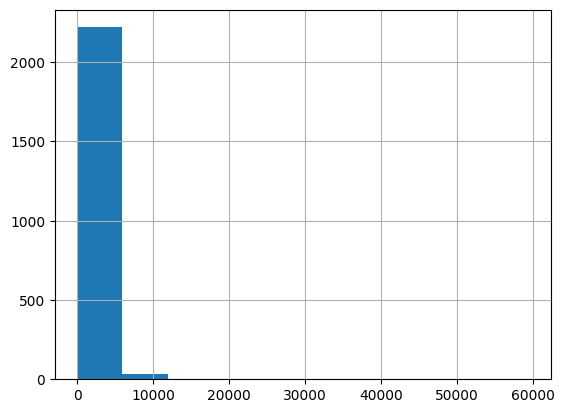

In [23]:
df_submission['submission_duration'].hist()

In [24]:
df_submission = df_submission[df_submission['submission_duration'] != 0]

In [27]:
print("no zero: ", len(df_submission))
print("data loss (%)", (size_before - len(df_submission)) / size_before * 100 )

no zero:  1799
data loss (%) 20.468611847922194


<Axes: >

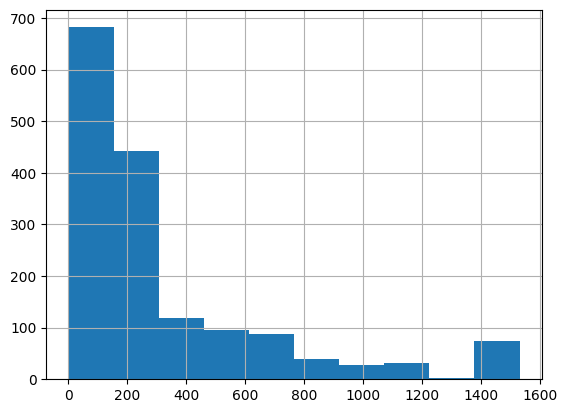

In [ ]:
# Q3 = df_submission['submission_duration'].quantile(0.75)
# Q1 = df_submission['submission_duration'].quantile(0.25)
# IQR = Q3 - Q1

# df_submission = df_submission[df_submission['submission_duration'] < (Q3 + (1.5 * IQR))]

# df_submission['submission_duration'].hist()


In [28]:
print("FInal size: ", len(df_submission))

FInal size:  1799


In [32]:
df_submission.to_csv(os.path.join(drive_path,
                                  'developer_journey_submissions_cleaned.csv'),
                      index=False)

## journey completion

In [33]:
df_completion = dfs['developer_journey_completions']
df_completion.head()

,user_id,journey_id,created_at,updated_at,enrolling_times,enrollments_at,last_enrolled_at,study_duration,avg_submission_rating
id,,,,,,,,,
"104,582","96,989",32,"Apr 11, 2020, 14:39","Apr 11, 2020, 14:39",3,"2018-08-29 11:19:45,2019-02-05 09:20:57,2020-0...","Feb 26, 2020, 17:05",44,4.50
"30,951","96,989",51,"Aug 10, 2019, 02:42","Aug 10, 2019, 02:42",1,2019-06-20 21:01:59,"Jun 20, 2019, 21:01",50,3.00
"74,313","96,989",74,"Dec 23, 2019, 06:22","Dec 23, 2019, 06:22",2,"2019-10-29 09:34:40,2019-10-31 09:38:30","Oct 31, 2019, 09:38",52,2.67
"26,219","96,989",83,"Jun 20, 2019, 05:45","Jun 20, 2019, 05:45",1,2019-06-14 18:15:40,"Jun 14, 2019, 18:15",5,3.00
"23,887","96,989",104,"May 18, 2019, 08:58","May 18, 2019, 08:58",1,2019-05-10 14:30:08,"May 10, 2019, 14:30",7,4.00


In [34]:
df_completion.isnull().sum()

,0
user_id,0
journey_id,0
created_at,0
updated_at,0
enrolling_times,0
enrollments_at,0
last_enrolled_at,0
study_duration,0
avg_submission_rating,558


In [36]:
df_completion[df_completion['avg_submission_rating'].isnull()]['user_id'].unique()

array(['96,989', '938,276', '5,021,477', '5,044,844', '5,051,374',
       '5,410,562', '3,390', '5,774', '11,836', '17,833', '32,258',
       '102,556', '110,119', '113,842', '153,116', '433,737', '494,342',
       '496,740', '518,124', '531,259', '791,882', '886,996', '1,202,367',
       '1,319,457', '1,776,122', '2,131,303', '2,135,328', '2,395,575',
       '3,557,828'], dtype=object)

In [38]:
df_completion['avg_submission_rating'].fillna(df_completion['avg_submission_rating'].mean(),
                                              inplace=True)

/tmp/ipython-input-430307122.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_completion['avg_submission_rating'].fillna(df_completion['avg_submission_rating'].mean(),


In [39]:
print(len(df_completion))
# df_completion.dropna(inplace=True)
# print(len(df_completion

1032


In [40]:
used_col = ['journey_id', 'user_id', 'enrolling_times',
            'last_enrolled_at', 'study_duration', 'avg_submission_rating']
df_completion[used_col].to_csv(os.path.join(drive_path, 'developer_journey_completion_clean.csv'),
                               index=False)

## Exam Registration

In [41]:
df_exam_reg = dfs['exam_registrations']
df_exam_reg.index = df_exam_reg.index.astype(str).str.rstrip(',').astype(int)
df_exam_reg.head()

,exam_module_id,tutorial_id,examinees_id,status,created_at,updated_at,deadline_at,retake_limit_at,exam_finished_at,deleted_at
id,,,,,,,,,,
42482,16,"7,444","96,989",2,"Apr 14, 2020, 08:45","Apr 14, 2020, 23:24","Apr 14, 2020, 09:15","Apr 14, 2020, 14:47","Apr 14, 2020, 08:57","Apr 14, 2020, 23:24"
45362,16,"7,444","96,989",2,"Apr 14, 2020, 23:24","Apr 19, 2020, 19:13","Apr 14, 2020, 23:54","Apr 15, 2020, 05:26","Apr 14, 2020, 23:36","Apr 19, 2020, 19:13"
60627,16,"7,444","96,989",2,"Apr 19, 2020, 19:13","Apr 19, 2020, 19:13","Apr 19, 2020, 19:43","Apr 20, 2020, 01:22","Apr 19, 2020, 19:32",NaN
74687,99,"7,851","96,989",2,"Apr 24, 2020, 10:59","Apr 24, 2020, 10:59","Apr 24, 2020, 11:29","Apr 24, 2020, 17:16","Apr 24, 2020, 11:16",NaN
105987,104,"7,852","96,989",2,"May 3, 2020, 13:39","May 6, 2020, 20:09","May 3, 2020, 14:09","May 3, 2020, 20:06","May 3, 2020, 14:06","May 6, 2020, 20:09"


In [42]:
df_exam_reg.isnull().sum()

,0
exam_module_id,0
tutorial_id,0
examinees_id,0
status,0
created_at,0
updated_at,0
deadline_at,0
retake_limit_at,0
exam_finished_at,0
deleted_at,7731


In [43]:
df_exam_reg.dropna(axis=1, inplace=True)

In [44]:
df_exam_reg_count = df_exam_reg.groupby(
    ['exam_module_id', 'tutorial_id', 'examinees_id']).count()

In [47]:
df_exam_reg_count.head()

status  created_at  updated_at  \
exam_module_id tutorial_id examinees_id                                   
1,013          6,160       1,202,367          4           4           4   
                           1,776,122          1           1           1   
                           433,737            1           1           1   
                           496,740            3           3           3   
                           531,259            3           3           3   

                                         deadline_at  retake_limit_at  \
exam_module_id tutorial_id examinees_id                                 
1,013          6,160       1,202,367               4                4   
                           1,776,122               1                1   
                           433,737                 1                1   
                           496,740                 3                3   
                           531,259                 3                3   

                                         exam_finished_at  
exam_module_id tutorial_id examinees_id                    
1,013          6,160       1,202,367                    4  
                           1,776,122                    1  
                           433,737                      1  
                           496,740                      3  
                           531,259                      3

In [48]:
df_exam_reg_count.reset_index().rename(columns={'status': 'retake_count'})[['exam_module_id', 'tutorial_id', 'examinees_id', 'retake_count']].to_csv(
    os.path.join(drive_path, 'exam_registration_merged.csv'), index=False
)

## Exam completion

In [49]:
df_exam_results = dfs['exam_results']
df_exam_results['exam_registration_id'] = df_exam_results['exam_registration_id'].apply(lambda x: x.replace(',', '')).astype(int)
df_exam_results.head()

,exam_registration_id,total_questions,score,is_passed,created_at,look_report_at
id,,,,,,
"42,762",42482,25,68,0,"Apr 14, 2020, 08:57","Apr 19, 2020, 19:12"
"45,652",45362,25,68,0,"Apr 14, 2020, 23:36","Apr 19, 2020, 19:12"
"61,017",60627,25,80,1,"Apr 19, 2020, 19:32","Apr 19, 2020, 19:32"
"75,107",74687,25,92,1,"Apr 24, 2020, 11:16","Apr 24, 2020, 11:16"
"106,507",105987,25,76,0,"May 3, 2020, 14:06","May 6, 2020, 20:09"


In [50]:
df_exam_results.isnull().sum()

,0
exam_registration_id,0
total_questions,0
score,0
is_passed,0
created_at,0
look_report_at,12609


In [51]:
df_exam_results = df_exam_results.dropna(axis=1)

In [53]:
df_exam = pd.merge(df_exam_results, df_exam_reg, left_on='exam_registration_id',
                   right_on='id')
df_exam['exam_duration'] = (
    pd.to_datetime(df_exam['exam_finished_at']) -
    pd.to_datetime(df_exam['created_at_y'])
)
df_exam['max_duration'] = (
    pd.to_datetime(df_exam['deadline_at']) -
    pd.to_datetime(df_exam['created_at_y'])
)
# df_exam['is_deleted'] = df_exam['deleted_at'].notna()

used_col = ['exam_registration_id', 'total_questions', 'score',
            'is_passed', 'exam_module_id', 'tutorial_id', 'examinees_id', 'status',
            'exam_duration', 'max_duration',
            # 'is_deleted',
            ]
df_exam[used_col].to_csv('exam_merged.csv', index=False)

In [54]:
df_exam = df_exam[used_col]
df_exam.head()

,exam_registration_id,total_questions,score,is_passed,exam_module_id,tutorial_id,examinees_id,status,exam_duration,max_duration
0,42482,25,68,0,16,"7,444","96,989",2,0 days 00:12:00,0 days 00:30:00
1,45362,25,68,0,16,"7,444","96,989",2,0 days 00:12:00,0 days 00:30:00
2,60627,25,80,1,16,"7,444","96,989",2,0 days 00:19:00,0 days 00:30:00
3,74687,25,92,1,99,"7,851","96,989",2,0 days 00:17:00,0 days 00:30:00
4,105987,25,76,0,104,"7,852","96,989",2,0 days 00:27:00,0 days 00:30:00


In [56]:
df_exam.isnull().sum()

,0
exam_registration_id,0
total_questions,0
score,0
is_passed,0
exam_module_id,0
tutorial_id,0
examinees_id,0
status,0
exam_duration,0
max_duration,0


## Exam exploration

<Axes: >

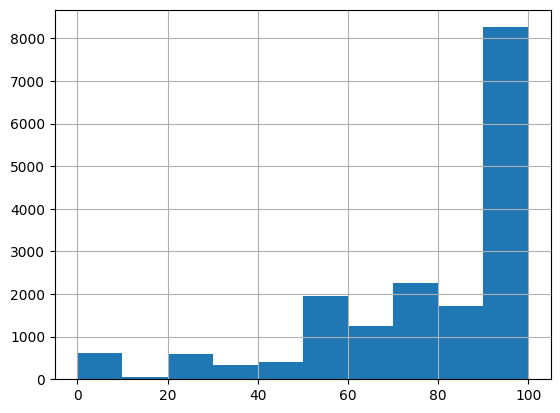

In [55]:
df_exam['score'].hist()

In [ ]:
# # score IQR
# Q3 = df_exam['score'].quantile(0.75)
# Q1 = df_exam['score'].quantile(0.25)
# IQR = Q3 - Q1

# print("Before outlier: ", len(df_exam))
# df_exam= df_exam[df_exam['score'] > (Q1 - (IQR * 1.5))]
# print("after outlier: ", len(df_exam))


Before outlier:  17438
after outlier:  16857


<Axes: >

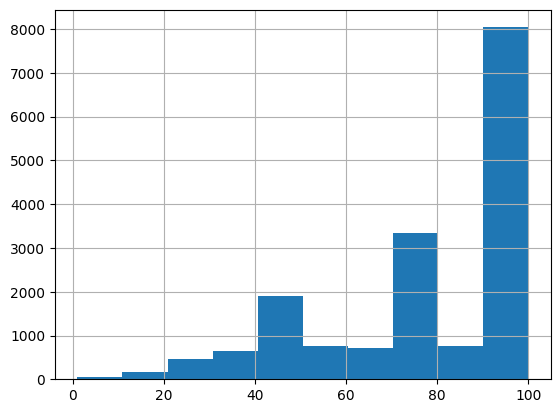

In [ ]:
df_exam['score'].hist()

In [57]:
len(df_exam['examinees_id'].unique())

29

In [58]:
df_exam['time_left'] = df_exam['max_duration'] - df_exam['exam_duration']
df_exam['time_left']

,time_left
0,0 days 00:18:00
1,0 days 00:18:00
2,0 days 00:11:00
3,0 days 00:13:00
4,0 days 00:03:00
...,...
17433,0 days 00:06:00
17434,0 days 00:02:00
17435,0 days 00:16:00
17436,0 days 00:02:00


In [59]:
df_exam['exam_time_utilization_pct'] = df_exam['exam_duration'] / df_exam['max_duration'] * 100

In [60]:
df_exam_group = df_exam.groupby('examinees_id').agg(
    max_score=('score', 'max'),
    average_score=('score', 'mean'),
    total_attemps=('exam_registration_id', 'count'),
    is_passed=('is_passed', 'sum'),
    avg_duration=('exam_duration', 'mean'),
    avg_time_left=('time_left', 'mean'),
    avg_time_utilization=('exam_time_utilization_pct', 'mean')
).reset_index()

print('shape: ', df_exam_group.shape)
df_exam_group.head()

shape:  (29, 8)


,examinees_id,max_score,average_score,total_attemps,is_passed,avg_duration,avg_time_left,avg_time_utilization
0,"1,202,367",100,57.256875,1491,560,0 days 00:06:58.350100603,0 days 00:08:01.126760563,47.354795
1,"1,319,457",100,95.070833,480,462,0 days 00:03:51.375000,0 days 00:08:21.250000,33.378935
2,"1,776,122",100,82.090686,408,335,0 days 00:04:10.147058823,0 days 00:10:33.235294117,31.668850
3,"102,556",100,84.425827,937,756,0 days 00:03:27.022411953,0 days 00:07:36.499466382,29.514763
4,"11,836",100,79.495652,345,268,0 days 00:05:16.521739130,0 days 00:07:40.173913043,36.563285


In [62]:
df_exam_group.to_csv(os.path.join(drive_path, 'exam_group.csv'), index=False)

In [64]:
df_exam_group.isnull().sum()

,0
examinees_id,0
max_score,0
average_score,0
total_attemps,0
is_passed,0
avg_duration,0
avg_time_left,0
avg_time_utilization,0


## Trackings exploration -- Merge by users

In [63]:
df_trackings.head()

,journey_id,tutorial_id,developer_id,status,last_viewed,first_opened_at,completed_at,seen_after_completion,study_duration_total,dow_start,dow_finished,dow_revisit
id,,,,,,,,,,,,
4192267,104,3107,96989,1,2019-05-11 18:23:24,2019-05-11 18:23:24,2019-05-12 13:06:05,False,1122.683333,Saturday,Sunday,Saturday
4203250,104,3110,96989,1,2019-05-13 18:29:58,2019-05-13 11:45:00,2019-05-13 18:30:17,False,405.283333,Monday,Monday,Monday
4206789,104,3233,96989,1,2019-05-14 15:39:34,2019-05-13 18:30:15,2019-05-13 18:38:50,True,8.583333,Monday,Monday,Tuesday
4206801,104,3236,96989,1,2019-05-14 15:39:55,2019-05-13 18:38:47,2019-05-13 18:51:42,True,12.916667,Monday,Monday,Tuesday
4206820,104,3239,96989,1,2019-05-13 18:51:42,2019-05-13 18:51:42,2019-05-13 20:34:07,False,102.416667,Monday,Monday,Monday


In [66]:
def get_consistency(row):
    # convert to numeric only
    counts = row.astype(float)

    total = counts.sum()
    max_count = counts.max()

    dominant = counts[counts == max_count].index.tolist()
    ratio = max_count / total if total > 0 else 0

    return pd.Series({
        "dominant_days": dominant,
        "consistency_ratio": ratio,
        "total_events": total
    })


In [67]:
df_dow_start = df_trackings[['developer_id', 'dow_start']].rename(columns={'dow_start': 'day_of_week'})
df_dow_finished = df_trackings[['developer_id', 'dow_finished']].rename(columns={'dow_finished': 'day_of_week'})

df_combined_dow = pd.concat([df_dow_start, df_dow_finished])

df_tracking_day_counts = df_combined_dow.groupby(['developer_id', 'day_of_week']).size().reset_index(name='count')
df_tracking_day_counts.head()

,developer_id,day_of_week,count
0,3390,Friday,950
1,3390,Monday,924
2,3390,Saturday,948
3,3390,Sunday,693
4,3390,Thursday,870


In [68]:
df_tracking_day_pivot = df_tracking_day_counts.pivot(index='developer_id', columns='day_of_week', values='count')
df_tracking_day_pivot.fillna(0, inplace=True)
df_tracking_day_pivot.columns.name = None
df_tracking_day_pivot.head()

,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
developer_id,,,,,,,
3390,950.0,924.0,948.0,693.0,870.0,1144.0,855.0
5774,558.0,454.0,763.0,980.0,245.0,398.0,360.0
11836,236.0,550.0,689.0,281.0,256.0,754.0,530.0
17833,617.0,681.0,256.0,708.0,750.0,632.0,1064.0
32258,624.0,1161.0,742.0,1334.0,747.0,697.0,829.0


In [69]:
def get_consistency(df_row):
    # df_row is expected to be a single-row DataFrame from the groupby.apply context
    # Convert the single row DataFrame into a Series for easier processing
    counts = df_row.astype(float) # Now counts is a Series

    total = counts.sum() # This will now be a scalar
    max_count = counts.max() # This will now be a scalar

    # Filter the Series to get days where count equals max_count
    # And get the index (day names) as a list
    dominant = counts[counts == max_count].index.tolist()
    ratio = max_count / total if total > 0 else 0

    return pd.Series({
        "dominant_days": dominant,
        "consistency_ratio": ratio,
        "total_events": total
    })

df_trackings_consistency = df_tracking_day_pivot.apply(get_consistency, axis=1)
df_trackings_consistency.head()

,dominant_days,consistency_ratio,total_events
developer_id,,,
3390,[Tuesday],0.179198,6384.0
5774,[Sunday],0.260777,3758.0
11836,[Tuesday],0.228762,3296.0
17833,[Wednesday],0.225998,4708.0
32258,[Sunday],0.217476,6134.0


In [70]:
df_trackings_consistency.index

Index([   3390,    5774,   11836,   17833,   32258,   96989,  102556,  110119,
        113842,  153116,  433737,  494342,  496740,  518124,  531259,  791882,
        886996,  938276, 1202367, 1319457, 1776122, 2131303, 2135328, 2395575,
       3557828, 5021477, 5044844, 5051374, 5181638, 5410562, 5410865],
      dtype='int64', name='developer_id')

In [71]:
df_trackings_consistency.to_csv(os.path.join(drive_path, 'developer_trackings_consistency.csv'),
                                index=True)

## df trackings exploration

In [72]:
df_trackings.head()

,journey_id,tutorial_id,developer_id,status,last_viewed,first_opened_at,completed_at,seen_after_completion,study_duration_total,dow_start,dow_finished,dow_revisit
id,,,,,,,,,,,,
4192267,104,3107,96989,1,2019-05-11 18:23:24,2019-05-11 18:23:24,2019-05-12 13:06:05,False,1122.683333,Saturday,Sunday,Saturday
4203250,104,3110,96989,1,2019-05-13 18:29:58,2019-05-13 11:45:00,2019-05-13 18:30:17,False,405.283333,Monday,Monday,Monday
4206789,104,3233,96989,1,2019-05-14 15:39:34,2019-05-13 18:30:15,2019-05-13 18:38:50,True,8.583333,Monday,Monday,Tuesday
4206801,104,3236,96989,1,2019-05-14 15:39:55,2019-05-13 18:38:47,2019-05-13 18:51:42,True,12.916667,Monday,Monday,Tuesday
4206820,104,3239,96989,1,2019-05-13 18:51:42,2019-05-13 18:51:42,2019-05-13 20:34:07,False,102.416667,Monday,Monday,Monday


In [74]:
df_trackings_group = df_trackings.groupby('developer_id').agg(
    avg_study_duration=("study_duration_total", "mean"),
    total_study_duration=("study_duration_total", "sum"),
    total_revisit=("seen_after_completion", "sum"),
    total_tutorial_completion=("tutorial_id", "count")
).reset_index()
print(df_trackings_group.shape)
df_trackings_group.head()

(31, 5)


,developer_id,avg_study_duration,total_study_duration,total_revisit,total_tutorial_completion
0,3390,143756.595087,4.588711e+08,714,3192
1,5774,69804.813571,1.311632e+08,176,1879
2,11836,121749.871288,2.006438e+08,192,1648
3,17833,145279.830459,3.419887e+08,686,2354
4,32258,257500.451538,7.897539e+08,866,3067


In [76]:
df_trackings_group.to_csv(os.path.join(drive_path, 'developer_trackings_group.csv'), index=False)

In [77]:
df_trackings_group.isna().sum()

,0
developer_id,0
avg_study_duration,0
total_study_duration,0
total_revisit,0
total_tutorial_completion,0


## df_completion

In [78]:
df_completion.head()

,user_id,journey_id,created_at,updated_at,enrolling_times,enrollments_at,last_enrolled_at,study_duration,avg_submission_rating
id,,,,,,,,,
"104,582","96,989",32,"Apr 11, 2020, 14:39","Apr 11, 2020, 14:39",3,"2018-08-29 11:19:45,2019-02-05 09:20:57,2020-0...","Feb 26, 2020, 17:05",44,4.50
"30,951","96,989",51,"Aug 10, 2019, 02:42","Aug 10, 2019, 02:42",1,2019-06-20 21:01:59,"Jun 20, 2019, 21:01",50,3.00
"74,313","96,989",74,"Dec 23, 2019, 06:22","Dec 23, 2019, 06:22",2,"2019-10-29 09:34:40,2019-10-31 09:38:30","Oct 31, 2019, 09:38",52,2.67
"26,219","96,989",83,"Jun 20, 2019, 05:45","Jun 20, 2019, 05:45",1,2019-06-14 18:15:40,"Jun 14, 2019, 18:15",5,3.00
"23,887","96,989",104,"May 18, 2019, 08:58","May 18, 2019, 08:58",1,2019-05-10 14:30:08,"May 10, 2019, 14:30",7,4.00


In [79]:
df_completion.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1032 entries, 104,582 to 3,798,941
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                1032 non-null   object 
 1   journey_id             1032 non-null   int64  
 2   created_at             1032 non-null   object 
 3   updated_at             1032 non-null   object 
 4   enrolling_times        1032 non-null   int64  
 5   enrollments_at         1032 non-null   object 
 6   last_enrolled_at       1032 non-null   object 
 7   study_duration         1032 non-null   object 
 8   avg_submission_rating  1032 non-null   float64
dtypes: float64(1), int64(2), object(6)
memory usage: 112.9+ KB


In [80]:
df_completion['study_duration'] = df_completion['study_duration'].apply(lambda x: x.replace(',', '')).astype(float)

<Axes: >

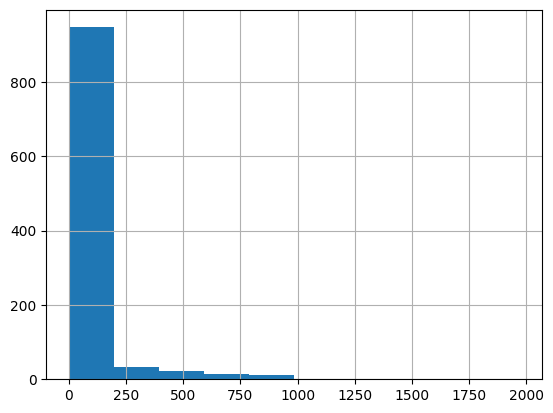

In [81]:
df_completion['study_duration'].hist()

In [82]:
# Q3 = df_completion['study_duration'].quantile(0.75)
# Q1 = df_completion['study_duration'].quantile(0.25)
# IQR = Q3 - Q1

# df_completion = df_completion[df_completion['study_duration'] < (Q3 + (1.5 * IQR))]

In [83]:
df_completion['study_duration'].min()

0.0

In [84]:
df_completion = df_completion[df_completion['study_duration'] > 0]

In [88]:
df_completion_group = df_completion.groupby('user_id').agg(
    {
        'enrolling_times': 'sum',
        'study_duration': 'mean',
        'avg_submission_rating': 'mean'
    }
).reset_index().rename(columns={
    'study_duration': 'avg_total_course_completion_duration'
})
df_completion_group.head()

,user_id,enrolling_times,avg_total_course_completion_duration,avg_submission_rating
0,"1,202,367",52,53.945946,4.202000
1,"1,319,457",33,59.233333,4.473576
2,"1,776,122",24,99.958333,3.815243
3,"102,556",51,197.348837,4.423247
4,"11,836",43,205.565217,4.173629


In [90]:
print(df_completion_group.shape)
df_completion_group.to_csv(os.path.join(drive_path, 'developer_completion_group.csv'),
                           index=False)

(28, 4)


# Merge all

In [91]:
df_completion_group['user_id'] = df_completion_group['user_id'].apply(lambda x: x.replace(',', '')).astype(int)

In [92]:
df = pd.merge(df_trackings_group, df_completion_group, left_on='developer_id', right_on='user_id', how='left')
df.head()

,developer_id,avg_study_duration,total_study_duration,total_revisit,total_tutorial_completion,user_id,enrolling_times,avg_total_course_completion_duration,avg_submission_rating
0,3390,143756.595087,4.588711e+08,714,3192,3390.0,61.0,54.960000,4.064833
1,5774,69804.813571,1.311632e+08,176,1879,5774.0,23.0,78.105263,4.149933
2,11836,121749.871288,2.006438e+08,192,1648,11836.0,43.0,205.565217,4.173629
3,17833,145279.830459,3.419887e+08,686,2354,17833.0,44.0,49.131579,4.325718
4,32258,257500.451538,7.897539e+08,866,3067,32258.0,75.0,82.517241,3.965069


In [93]:
df_exam_group['examinees_id'] = df_exam_group['examinees_id'].apply(lambda x: x.replace(',', '')).astype(int)

In [94]:
df = pd.merge(df, df_exam_group, left_on='developer_id', right_on='examinees_id', how='left')
df.head()

,developer_id,avg_study_duration,total_study_duration,total_revisit,total_tutorial_completion,user_id,enrolling_times,avg_total_course_completion_duration,avg_submission_rating,examinees_id,max_score,average_score,total_attemps,is_passed,avg_duration,avg_time_left,avg_time_utilization
0,3390,143756.595087,4.588711e+08,714,3192,3390.0,61.0,54.960000,4.064833,3390.0,100.0,79.831190,622.0,450.0,0 days 00:06:22.668810289,0 days 00:05:31.639871382,56.309396
1,5774,69804.813571,1.311632e+08,176,1879,5774.0,23.0,78.105263,4.149933,5774.0,100.0,67.090535,486.0,253.0,0 days 00:26:19.382716049,-1 days +23:50:29.876543210,54.903521
2,11836,121749.871288,2.006438e+08,192,1648,11836.0,43.0,205.565217,4.173629,11836.0,100.0,79.495652,345.0,268.0,0 days 00:05:16.521739130,0 days 00:07:40.173913043,36.563285
3,17833,145279.830459,3.419887e+08,686,2354,17833.0,44.0,49.131579,4.325718,17833.0,100.0,86.265487,339.0,286.0,0 days 00:03:14.159292035,0 days 00:08:41.769911504,30.963946
4,32258,257500.451538,7.897539e+08,866,3067,32258.0,75.0,82.517241,3.965069,32258.0,100.0,84.589880,751.0,613.0,0 days 00:03:35.792276964,0 days 00:07:32.756324900,31.713715


In [95]:
df = pd.merge(df, df_trackings_consistency, left_on='developer_id', right_on='developer_id', how='left')
df.head()

,developer_id,avg_study_duration,total_study_duration,total_revisit,total_tutorial_completion,user_id,enrolling_times,avg_total_course_completion_duration,avg_submission_rating,examinees_id,max_score,average_score,total_attemps,is_passed,avg_duration,avg_time_left,avg_time_utilization,dominant_days,consistency_ratio,total_events
0,3390,143756.595087,4.588711e+08,714,3192,3390.0,61.0,54.960000,4.064833,3390.0,100.0,79.831190,622.0,450.0,0 days 00:06:22.668810289,0 days 00:05:31.639871382,56.309396,[Tuesday],0.179198,6384.0
1,5774,69804.813571,1.311632e+08,176,1879,5774.0,23.0,78.105263,4.149933,5774.0,100.0,67.090535,486.0,253.0,0 days 00:26:19.382716049,-1 days +23:50:29.876543210,54.903521,[Sunday],0.260777,3758.0
2,11836,121749.871288,2.006438e+08,192,1648,11836.0,43.0,205.565217,4.173629,11836.0,100.0,79.495652,345.0,268.0,0 days 00:05:16.521739130,0 days 00:07:40.173913043,36.563285,[Tuesday],0.228762,3296.0
3,17833,145279.830459,3.419887e+08,686,2354,17833.0,44.0,49.131579,4.325718,17833.0,100.0,86.265487,339.0,286.0,0 days 00:03:14.159292035,0 days 00:08:41.769911504,30.963946,[Wednesday],0.225998,4708.0
4,32258,257500.451538,7.897539e+08,866,3067,32258.0,75.0,82.517241,3.965069,32258.0,100.0,84.589880,751.0,613.0,0 days 00:03:35.792276964,0 days 00:07:32.756324900,31.713715,[Sunday],0.217476,6134.0


In [96]:
print(df.shape)

(31, 20)


In [97]:
# drop rest of fk
fk_col = ['user_id', 'examinees_id']
df.drop(columns=fk_col, inplace=True)

In [98]:
# check NaN
df.isna().sum()

,0
developer_id,0
avg_study_duration,0
total_study_duration,0
total_revisit,0
total_tutorial_completion,0
enrolling_times,3
avg_total_course_completion_duration,3
avg_submission_rating,3
max_score,2
average_score,2


In [100]:
df['enrolling_times'].fillna(1, inplace=True)
df['avg_total_course_completion_duration'].fillna(df['avg_total_course_completion_duration'].mean(), inplace=True)
df['avg_submission_rating'].fillna(df['avg_submission_rating'].mean(), inplace=True)
df['max_score'].fillna(df['max_score'].max(), inplace=True)
df['average_score'].fillna(df['average_score'].mean(), inplace=True)
df['total_attemps'].fillna(df['total_attemps'].mean(), inplace=True)
df['is_passed'].fillna(df['is_passed'].mean(), inplace=True)
df['avg_duration'].fillna(df['avg_duration'].mean(), inplace=True)
df['avg_time_left'].fillna(df['avg_time_left'].mean(), inplace=True)
df['avg_time_utilization'].fillna(df['avg_time_utilization'].mean(), inplace=True)

df.isna().sum()


/tmp/ipython-input-602866732.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['enrolling_times'].fillna(1, inplace=True)
/tmp/ipython-input-602866732.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using '

,0
developer_id,0
avg_study_duration,0
total_study_duration,0
total_revisit,0
total_tutorial_completion,0
enrolling_times,0
avg_total_course_completion_duration,0
avg_submission_rating,0
max_score,0
average_score,0


In [101]:
df.to_csv(os.path.join(drive_path, 'final_datsest_v0-2.csv'), index=False)

array([[<Axes: title={'center': 'avg_study_duration'}>,
        <Axes: title={'center': 'total_study_duration'}>,
        <Axes: title={'center': 'total_revisit'}>,
        <Axes: title={'center': 'total_tutorial_completion'}>],
       [<Axes: title={'center': 'enrolling_times'}>,
        <Axes: title={'center': 'avg_total_course_completion_duration'}>,
        <Axes: title={'center': 'avg_submission_rating'}>,
        <Axes: title={'center': 'max_score'}>],
       [<Axes: title={'center': 'average_score'}>,
        <Axes: title={'center': 'total_attemps'}>,
        <Axes: title={'center': 'is_passed'}>,
        <Axes: title={'center': 'avg_time_utilization'}>],
       [<Axes: title={'center': 'consistency_ratio'}>,
        <Axes: title={'center': 'total_events'}>, <Axes: >, <Axes: >]],
      dtype=object)

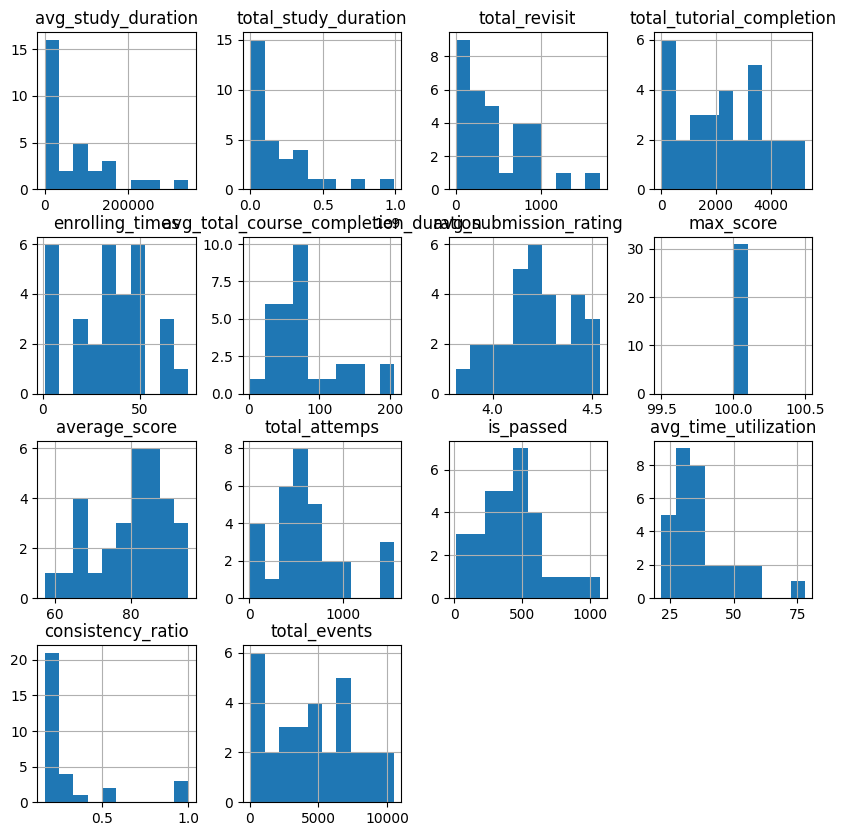

In [102]:
# plot all column except developer_id
df.drop(columns=['developer_id']).hist(figsize=(10, 10))